In [ ]:
## Callin Switzer
## Capture Images from pt grey camera

In [1]:
# setup arduino
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

import datetime

import PyCapture2 as fc2
import sys

import time

import os
import peakutils 
import msvcrt
import winsound
import shutil
import pandas as pd

import skimage.io as io

In [2]:
print("last update: "  +  str(datetime.datetime.now()))

last update: 2017-11-14 16:14:37.186379


In [3]:
# capture image with point grey camera
bus = fc2.BusManager()
numCams = bus.getNumOfCameras()
print("Number of cameras detected: ", numCams)
if not numCams:
    print("Insufficient number of cameras. Exiting...")
    exit()

Number of cameras detected:  2


In [4]:
def enableEmbeddedTimeStamp(cam, enableTimeStamp):
    embeddedInfo = cam.getEmbeddedImageInfo()
    if embeddedInfo.available.timestamp:
        cam.setEmbeddedImageInfo(timestamp = enableTimeStamp)
        if(enableTimeStamp):
            print("\nTimeStamp is enabled.\n")
        else:
            print("\nTimeStamp is disabled.\n")

In [5]:
# open qtconsole if it's not already running
try:
    console_is_running
except NameError:
    console_is_running = True
    %qtconsole

In [6]:
def printCameraInfo(cam):
    camInfo = cam.getCameraInfo()
    print("\n*** CAMERA INFORMATION ***\n")
    print("Serial number - ", camInfo.serialNumber)
    print("Camera model - ", camInfo.modelName)
    print("Camera vendor - ", camInfo.vendorName)
    print("Sensor - ", camInfo.sensorInfo)
    print("Resolution - ", camInfo.sensorResolution)
    print("Firmware version - ", camInfo.firmwareVersion)
    print("Firmware build time - ", camInfo.firmwareBuildTime)
    fRateProp = cam.getProperty(fc2.PROPERTY_TYPE.FRAME_RATE)
    print("FrameRate - ", fRateProp.absValue)
    print()

In [7]:
c = fc2.Camera()
c.connect(bus.getCameraFromIndex(0))
printCameraInfo(c)

d = fc2.Camera()
d.connect(bus.getCameraFromIndex(1))
printCameraInfo(d)


*** CAMERA INFORMATION ***

Serial number -  16061221
Camera model -  b'Chameleon3 CM3-U3-13Y3C'
Camera vendor -  b'Point Grey Research'
Sensor -  b'OnSemi PYTHON1300 (1/2" Color CMOS)'
Resolution -  b'1280x1024'
Firmware version -  b'1.9.3.0'
Firmware build time -  b'Mon Jul 27 20:45:52 2015'
FrameRate -  92.39653778076172


*** CAMERA INFORMATION ***

Serial number -  16060682
Camera model -  b'Chameleon3 CM3-U3-13Y3C'
Camera vendor -  b'Point Grey Research'
Sensor -  b'OnSemi PYTHON1300 (1/2" Color CMOS)'
Resolution -  b'1280x1024'
Firmware version -  b'1.9.3.0'
Firmware build time -  b'Mon Jul 27 20:45:52 2015'
FrameRate -  92.39653778076172



In [8]:
def img2array(image):
    return(np.array(image.getData(), dtype="uint8").reshape( (image.getRows(), image.getCols()) ))

In [9]:
def saveImgHelper2(cam, cam2, numImages):

    frameTimes = []
    frames = []
    frames2 = []
    for i in range(numImages):
        try:
            image = cam.retrieveBuffer()
            image2 = cam2.retrieveBuffer()
            
            
#             frames.append(image)
#             frames2.append(image2)
        except fc2.Fc2error as fc2Err:
            print("Error retrieving buffer : ", fc2Err)
            continue
        frameTimes.append(time.time())
        
        print(i)
        
    print(np.diff(frameTimes))
    return(frames, frames2)

In [10]:
c = fc2.Camera()
c.connect(bus.getCameraFromIndex(0))
enableEmbeddedTimeStamp(c, True)
c.startCapture()


d = fc2.Camera()
d.connect(bus.getCameraFromIndex(1))
enableEmbeddedTimeStamp(d, True)
d.startCapture()



TimeStamp is enabled.


TimeStamp is enabled.



In [12]:
frames = []
stt = time.time()
image = c.retrieveBuffer()

for ii in range(100):
   
    image.save(("C:\\Users\\Combes4\\Desktop\\twoCamSave\\images\\stuff\\" + str(ii).zfill(4) + ".png").encode('utf-8'), fc2.IMAGE_FILE_FORMAT.PNG )

time.time() - stt

21.47351360321045

In [13]:
frames = []
stt = time.time()
image = c.retrieveBuffer()

for ii in range(100):
   
    image.save(("C:\\Users\\Combes4\\Desktop\\twoCamSave\\images\\stuff\\" + str(ii).zfill(4) + ".pgm").encode('utf-8'), fc2.IMAGE_FILE_FORMAT.PGM )

time.time() - stt

8.562429428100586

In [14]:
frames = []
stt = time.time()
image = c.retrieveBuffer()

for ii in range(100):
   
    image.save(("C:\\Users\\Combes4\\Desktop\\twoCamSave\\images\\stuff\\" + str(ii).zfill(4) + ".ppm").encode('utf-8'), fc2.IMAGE_FILE_FORMAT.PPM )

time.time() - stt

25.468917846679688

In [37]:
frames = []
stt = time.time()
image = c.retrieveBuffer()

for ii in range(100):
    image = c.retrieveBuffer()
   
    image.save(("C:\\Users\\Combes4\\Desktop\\twoCamSave\\images\\stuff\\" + str(ii).zfill(4) + ".raw").encode('utf-8'), fc2.IMAGE_FILE_FORMAT.RAW )

time.time() - stt

19.880298852920532

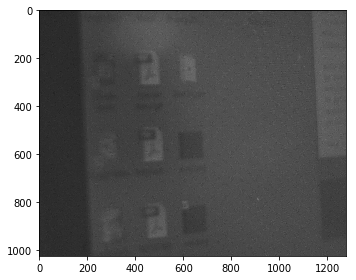

In [38]:
io.imshow(img2array(image))
io.imsave("C:\\Users\\Combes4\\Desktop\\array2png.tiff", img2array(image))

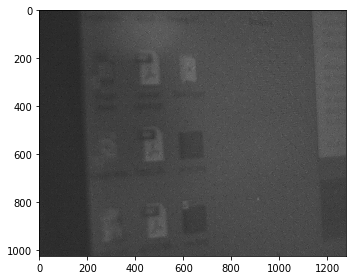

In [39]:
imgg = np.fromfile("C:\\Users\\Combes4\\Desktop\\twoCamSave\\images\\stuff\\0004.raw", dtype=np.uint8)
imgg.shape = ((image.getRows(), image.getCols()))
io.imshow(imgg)
io.imsave("C:\\Users\\Combes4\\Desktop\\raw2png.tiff", imgg)

In [40]:
(image.getRows(), image.getCols())

(1024, 1280)

In [ ]:
# can convert one image with ffmpeg: ffmpeg -f rawvideo -pixel_format gray -video_size 1280x1024 -i 0004.raw output.png

In [19]:
img = np.fromfile("C:\\Users\\Combes4\\Desktop\\twoCamSave\\images\\stuff\\0004.raw")
img.reshape( (image.getRows(), image.getCols(), 3) )

ValueError: cannot reshape array of size 163840 into shape (1024,1280,3)

In [ ]:
frames = []
stt = time.time()
image = c.retrieveBuffer()
fileName = os.path.join(directory, "SaveImageToAviEx.avi")
avi = fc2.AVIRecorder()
avi.AVIOpen(fileName.encode('utf-8'), 10)

for ii in range(100):
   
    avi.append(image)
    print(ii)
avi.close()
time.time() - stt

In [ ]:
def saveAviHelper2(cam, cam2, fileFormat, fileName, fileName2, frameRate):
    numImages = 100

    avi = fc2.AVIRecorder()
    avi2 = fc2.AVIRecorder()
    stt = time.time()

    for i in range(numImages):
        try:
            image = cam.retrieveBuffer()
            image2 = cam2.retrieveBuffer()
            stt = time.time()
        except fc2.Fc2error as fc2Err:
            print("Error retrieving buffer : ", fc2Err)
            continue

        print("Grabbed image {}".format(i))

        if (i == 0):
            if fileFormat == "AVI":
                avi.AVIOpen(fileName, frameRate)
                avi2.AVIOpen(fileName2, frameRate)
#             elif fileFormat == "MJPG":
#                 avi.MJPGOpen(fileName, frameRate, 75)
#             elif fileFormat == "H264":
#                 avi.H264Open(fileName, frameRate, image.getCols(), image.getRows(), 1000000)
            else:
                print("Specified format is not available.")
                return

        avi.append(image)
        avi2.append(image2)
        print(i)
    
    print(time.time() - stt)
    avi.close()
    avi2.close()

In [ ]:
c = fc2.Camera()
c.connect(bus.getCameraFromIndex(0))
enableEmbeddedTimeStamp(c, True)
c.startCapture()


d = fc2.Camera()
d.connect(bus.getCameraFromIndex(1))
enableEmbeddedTimeStamp(c, True)
d.startCapture()


In [ ]:
directory = os.path.join("C:\\Users\\Combes4\Desktop\\twoCamSave")
fileName = os.path.join(directory, "SaveImageToAviEx.avi")
fileName2 = os.path.join(directory, "SaveImageToAviEx2.avi")
frameRate = (c.getProperty(fc2.PROPERTY_TYPE.FRAME_RATE)).absValue
saveAviHelper2(c,d, "AVI", fileName.encode("utf-8"), fileName2.encode("utf-8"), 10)

In [ ]:
# When everything done, release the capture
c.stopCapture()
c.disconnect()

d.stopCapture()
d.disconnect()
cv2.destroyAllWindows()

In [ ]:
f1, f2 = saveImgHelper2(c, d, 20)

In [ ]:
f1

In [ ]:
jj = 3

io.imshow(img2array(f1[jj]))
plt.show()
io.imshow(img2array(f2[jj]))

In [ ]:
# When everything done, release the capture
c.stopCapture()
c.disconnect()

d.stopCapture()
d.disconnect()
cv2.destroyAllWindows()

In [ ]:
for ii in range(10): 
    io.imshow(img2array(f1[ii]))
    plt.show()

In [ ]:
directory = os.path.join("C:\\Users\\Combes4\Desktop\\twoCamSave")
fileName = os.path.join(directory, "SaveImageToAviEx.avi")
fileName2 = os.path.join(directory, "SaveImageToAviEx2.avi")
frameRate = (c.getProperty(fc2.PROPERTY_TYPE.FRAME_RATE)).absValue
saveAviHelper2(c,d, "AVI", fileName.encode("utf-8"), fileName2.encode("utf-8"), 10)

In [ ]:
# combine videos to see if they're both the same

vidPath = 'C:\\Users\\Combes4\\Desktop\\twoCamSave\\SaveImageToAviEx-0000.avi'
vidPath2 = 'C:\\Users\\Combes4\\Desktop\\twoCamSave\\SaveImageToAviEx2-0000.avi'

cap = cv2.VideoCapture(vidPath)
cap2 = cv2.VideoCapture(vidPath2)

length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

print( length, width, height, fps)

In [ ]:

ctr = 0
photoDir = os.path.join("C:\\Users\\Combes4\Desktop\\twoCamSave\\images\\")

# make directory, if it doesn't exist
if not os.path.exists(photoDir):
    os.makedirs(photoDir)

for ff in range(length):
    ret, frame = cap.read()
    ret2, frame2 = cap2.read()
    im2 = np.concatenate((frame, frame2), axis = 1)
    cv2.imwrite(photoDir + str(ctr).zfill(4) + '.jpg', im2)
    print(ff)
    ctr += 1

In [ ]:
# # convert images to video with ffmpeg
# # I can't get this to work in windows
# os.chdir(photoDir)
# # use ffmpeg to convert directory to video
# # -r is output frame rate
# stta = time.time()
# !ffmpeg -start_number 1 -i %04d.jpg -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v h264 -pix_fmt yuv420p -y combinedVid.mp4
# print(time.time() - stta) # time the video writing